<a href="https://colab.research.google.com/github/nayonsoso/hg-mldl/blob/main/Ch02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02-1 훈련 세트와 테스트 세트

※ 아래 내용은 모두 데이터와 정답이 연결된 **지도학습**을 기준으로 하고있음

훈련 세트와 테스트 세트가 동일하다면, 모델이 제대로 학습되었는지 평가하기 어렵다.

따라서 훈련 세트와 테스트 세트를 분리해줘야 한다.

**용어 정리**

훈련 세트 : 모델 훈련에 사용되는 데이터 세트

테스트 세트 : 테스트에 사용되는 데이터 세트

입력 (x,input) : 데이터

타깃 (y,라벨,target) : 정답

샘플 : 입력 - 타깃이 연결된 하나의 데이터


## 도미와 빙어 데이터를 합쳐 입력 - 타깃 데이터 만들기

In [1]:
# 도미와 빙어를 합친 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
               925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0,
               9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

## 35개를 훈련세트로, 14개를 테스트세트로 분류

In [2]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 인덱스 슬라이싱
train_input = fish_data[:35] # 0~34
train_target = fish_target[:35]
test_input = fish_data[35:] # 35~48
test_target = fish_target[35:] 
kn = kn.fit(train_input, train_target)
kn.score(train_input, train_target)

1.0

In [3]:
kn.score(test_input, test_target)
# 훈련세트로 평가했을 때는 1이 나오던 점수가 테스트 세트로 평가하니 0이 나옴

0.0

### 샘플링 편향의 오류 발생

훈련 세트에는 '도미'만 있고 테스트 세트에는 '빙어'만 있음

-> 정답률 0 라는 오류 발생

이러한 오류 발생을 막기 위해서 데이터를 **전처리**하는 과정이 필요함

-> 배열 연산을 도와주는 numpy 라이브러리 활용

In [4]:
import numpy as np
# 파이썬 리스트를 numpy 배열로 바꾸기 - numpy로 배열 계산을 편하게 하기 위함
input_arr = np.array(fish_data)    # 길이와 무게
target_arr = np.array(fish_target) # 1이면 도미, 0이면 빙어
print('인풋 데이터 :',input_arr.shape,', 타겟 데이터', target_arr.shape)

인풋 데이터 : (49, 2) , 타겟 데이터 (49,)


### numpy를 이용해 데이터 세트 섞기

샘플링 편향을 해결하기 위해 numpy를 이용해 행렬을 섞어보자

- 랜덤 배열 생성

- 배열 인덱싱 (한번에 여러 인덱스를 선택하는 것)

**랜덤 배열 생성**

In [5]:
# 랜덤 배열 생성
np.random.seed(42) # 책과 동일한 결과를 위해 설정한 것
index = np.arange(49) # 0부터 48을 갖는 배열 생성
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


**배열 인덱싱**

배열 인덱싱이란? 위에서 랜덤하게 섞은 인덱스를 이용해 만들어둔 배열을 섞기

-> 랜덤하게 섞인 인덱스의 값을 데이터의 인덱스로 활용

ex. input_arr[index[:35]] == input_arr[13], input_arr[45], input_arr[47] , ... , input_arr[10], input_arr[20] 

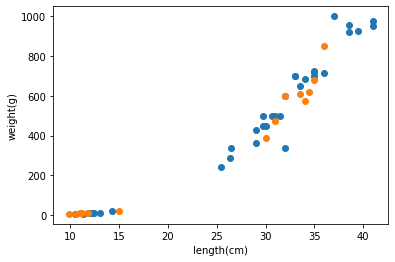

In [6]:
# 배열 인덱싱
train_input = input_arr[index[:35]]   # train_x
train_target = target_arr[index[:35]] # train_y
test_input = input_arr[index[35:]]    # test_x
test_target = target_arr[index[35:]]  # test_y

# 배열 인덱싱 확인
import matplotlib.pyplot as plt
# x축이 train_x의 0번째 행(=길이), y축이 train_x의 1번째 행(=무게)
plt.scatter(train_input[:,0], train_input[:,1])
# x축이 test_x의 0번째 행(=길이), y축이 test_x의 1번째 행(=무게)
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length(cm)')
plt.ylabel('weight(g)')
plt.show()

### 모델 훈련, 결과 확인

In [7]:
# 모델 훈련
kn = kn.fit(train_input, train_target)
# 점수 확인
kn.score(test_input, test_target)
# 실제 결과 확인
# kn.predict(test_input)
# test_target

1.0